# Plotting functions

## Visualizing statistical relationships

통계 분석은 데이터 세트의 변수가 서로 어떻게 관련되어 있고 이러한 관계가 다른 변수에 어떻게 의존하는지 이해하는 프로세스입니다.   
데이터가 제대로 시각화되면 사람의 눈으로 관계를 나타내는 경향과 패턴을 볼 수 있기 때문에 시각화는 이 프로세스의 핵심 요소라고 할 수 있습니다.   
  
이 튜토리얼에서는 세 가지 seaborn 함수에 대해 설명합니다.  
1. `relplot()` : 일반적인 접근 방식인 산점도와 선그래프를 사용해 통계적 관계를 시각화하기 위한 figure-level 기능
   `relplot()`은 FacetGrid와 다음 두 axes-level 함수 중 하나와 결합합니다.  
    - `scatterplot()` : 기본값, kind = scatter 속성으로 사용  
    - `lineplot()` : kind = line 속성으로 사용

이러한 함수들은 복잡한 데이터 세트 구조를 단순하고 이해하기 쉽게 표현합니다.  
색조(hue), 크기(size) 및 스타일(style) 등 최대 3개의 추가 변수를 매핑하여 2차원 그래픽을 그리기 때문입니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plots
산점도는 통계 시각화의 핵심입니다.  
점 뭉치를 사용하여 두 변수의 공동 분포를 설명합니다. 여기서 각 포인트는 데이터 세트의 관찰을 나타냅니다.  
이 묘사를 통해 눈은 그들 사이에 의미 있는 관계가 있는지 여부에 대한 상당한 양의 정보를 추론할 수 있습니다.  

seaborn에서 산점도를 그리는 방법에는 여러 가지가 있습니다.   
1. `scatterplot()`: 두 변수가 모두 숫자일 때 사용하는 가장 기본적인 방법, 범주형 시각화 자습서에서는 산점도를 사용하여 범주형 데이터를 시각화하는 특수 도구를 볼 수 있습니다. replot()의 기본 플롯 으로 (kind="scatter")를 설정하여 강제 적용할 수도 있습니다.

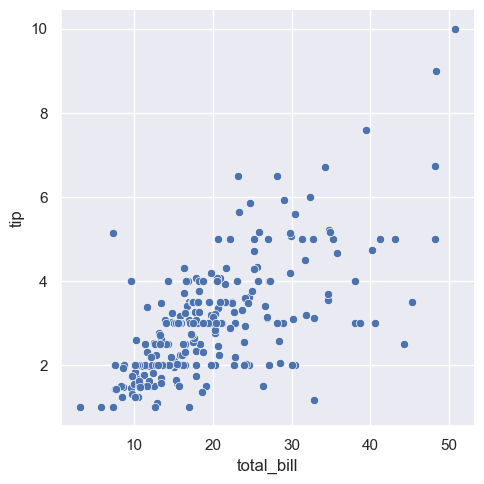

In [3]:
# 데이터세트 로드 및 기본 relplot 작성
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

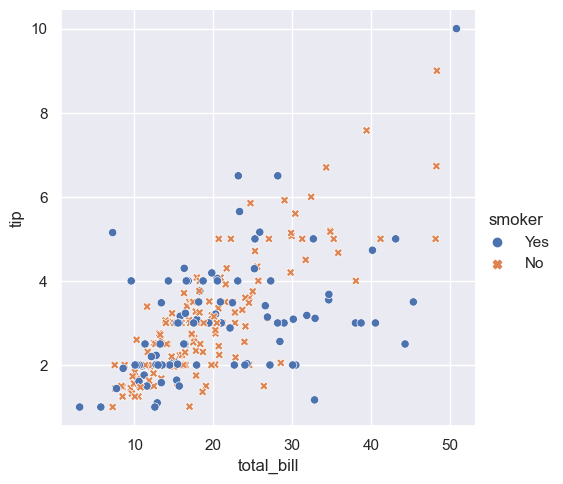

In [3]:
# 클래스간 차이 강조 & 접근성 개선을 위한 마커 스타일 적용
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

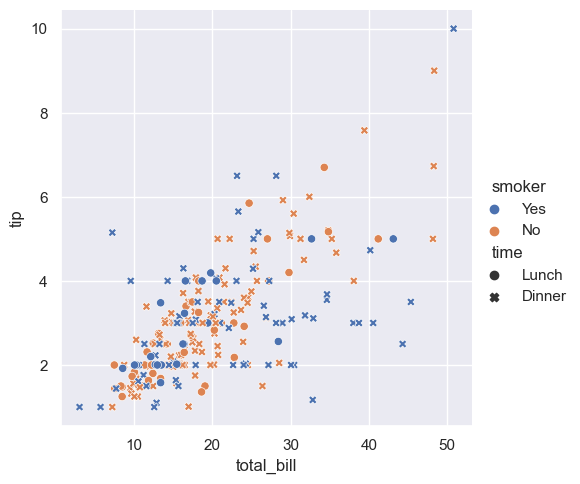

In [4]:
# 색조 및 스타일 분리
# 민감도 : 색상 > 모양
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

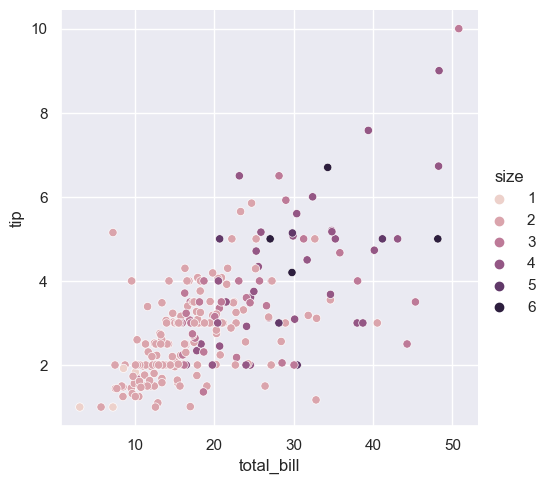

In [5]:
# 색조 변수 - 범주형 : 기본 팔레트 적용
# 색조 변수 - 숫자형(특히 float 타입일 경우) : 그라디언트 팔레트 적용
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

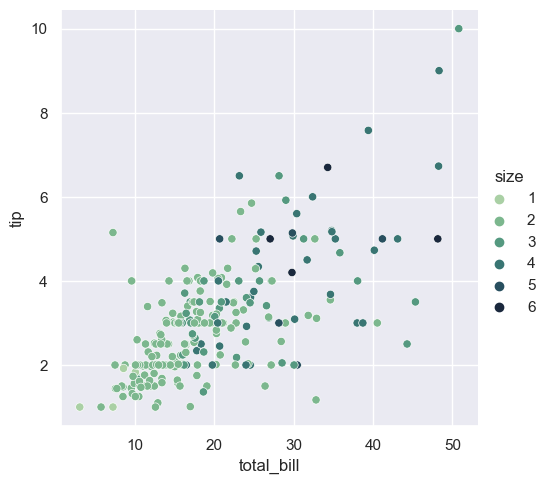

In [6]:
# 기본 적용 팔레트 외 사용자 정의도 가능
# 사용자 정의 예 > cubehelix_palette()의 문자열 인터페이스를 사용한 그라디언트 팔레트 정의
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

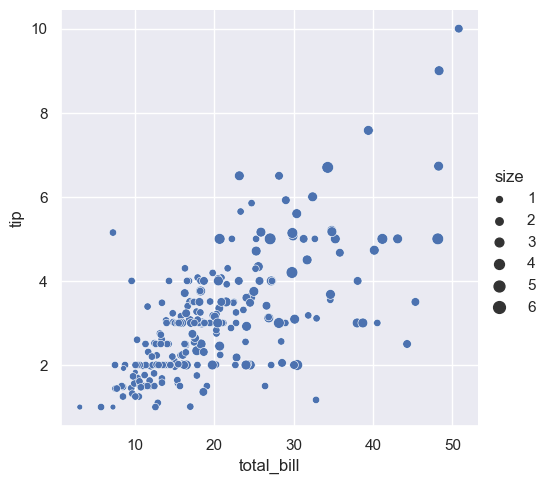

In [7]:
# 포인트 크기 변경 변수
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

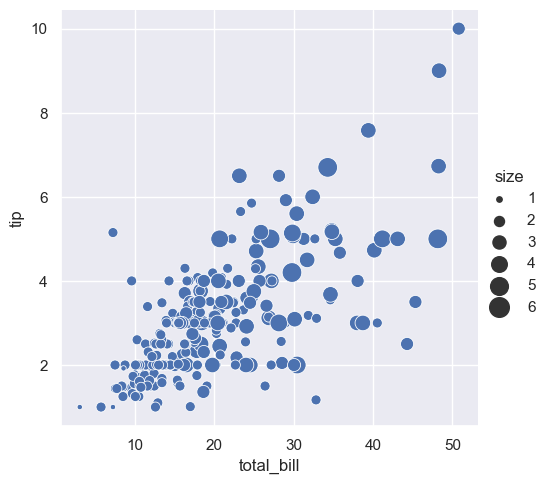

In [8]:
# size 아규먼트 값 : 데이터의 값 범위가 면적 단위의 범위로 정규화
# `matplotlib.pyplot.scatter()`: 점의 영역을 선택하는 데에 사용
# 이 범위 역시 사용자 정의 가능
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

추가 예제는 scatterplot() API 참고

## Emphasizing continuity with line plots
##### 연속성 강조
산점도는 매우 효과적이지만 항상 최적의 시각화 유형일 수는 없습니다.   
시각적 표현은 데이터세트의 세부사항과 플롯으로 **답변하려는 질문에 맞게 조정**되어야 합니다.   

어떤 데이터세트는 한 변수의 변화를 시간 또는 연속변수로 이해하고자 할 수 있습니다.  
이 때 선그래프는 좋은 선택입니다. lineplot() 함수를 직접 사용하거나 relplot()의 kind="line"을 설정을 사용합니다.

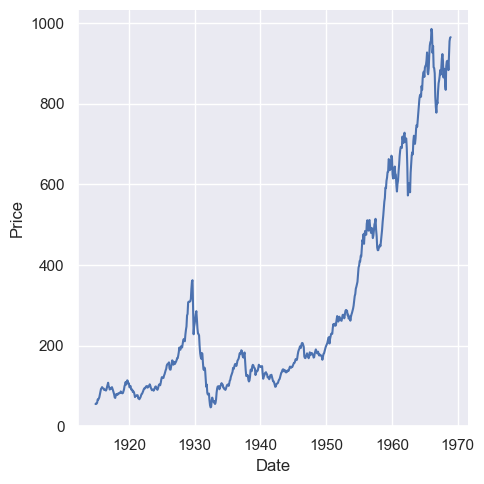

In [9]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

**Aggregation and representing uncertainty**  
더 복잡한 데이터세트는 x 변수의 동일한 값에 대해 여러 측정값을 갖습니다.  
seaborn은 기본적으로 평균과 95% 신뢰구간을 플로팅합니다.

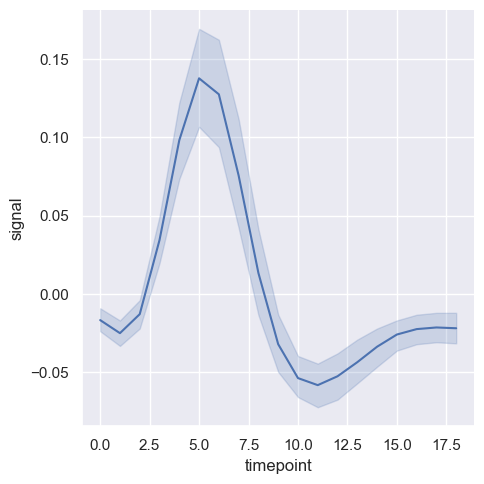

In [10]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

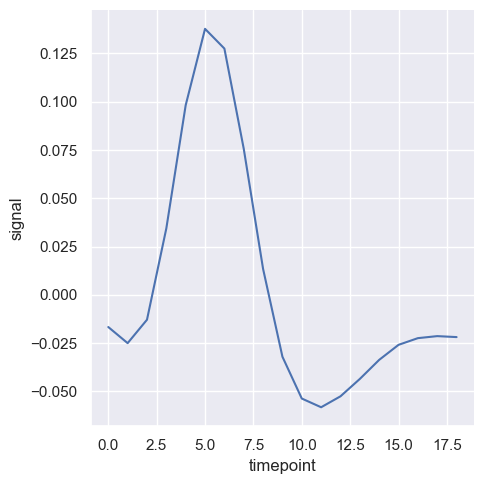

In [27]:
# 신뢰구간(errorbar): 부트스트래핑을 사용한 계산으로 큰 데이터는 시간이 많이 소요될 수 있으므로 필요하지 않을 경우 기능 off
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

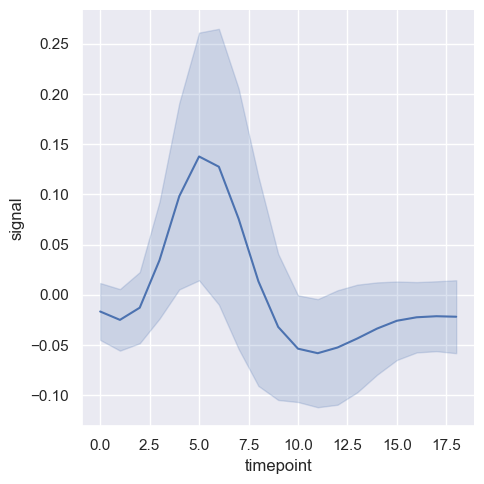

In [12]:
# 신뢰구간 대신 표준 편차(sd)를 플로팅해 각 시점별 분포의 확산 표현 가능
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

집계를 하지 않을 경우 추정기(estimator) 파라미터를 없음(None)으로 설정합니다.  
이럴 경우 데이터에 각 지점에 여러 관찰이 있다면 이상한 형태로 그려질 수 있습니다.

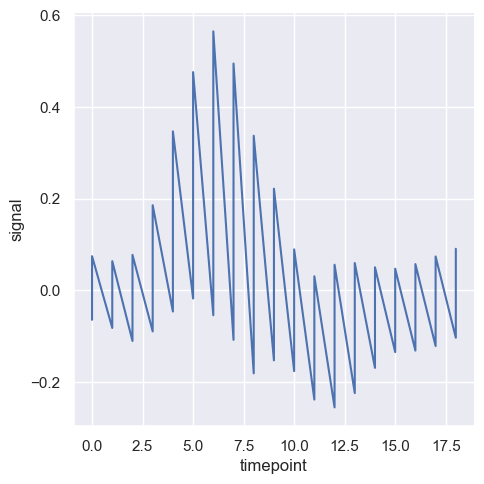

In [13]:

sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

**Plotting subsets of data with semantic mappings**  
`lineplot()` 함수는 `scatterplot()`과 동일한 유연성을 가집니다.  
플롯 요소의 색조(hue), 크기(size) 및 스타일(style)을 수정하여 최대 3개의 추가 변수를 표시할 수 있습니다.  
(= scatterplot()과 동일한 API 사용)

즉, matplotlib에서 선이냐 점이냐 하고 모양을 제어하는 매개변수에 대해 멈추고 생각할 필요가 없습니다.  
  
`lineplot()`에서 시맨틱을 사용하면 데이터가 집계되는 방식도 결정됩니다.  
예를 들어 두 가지 수준의 색조 시맨틱을 추가하면 플롯이 두 개의 선과 오류 밴드로 분할되고 각각에 해당하는 데이터의 하위 집합을 나타내기 위해 색상이 지정됩니다

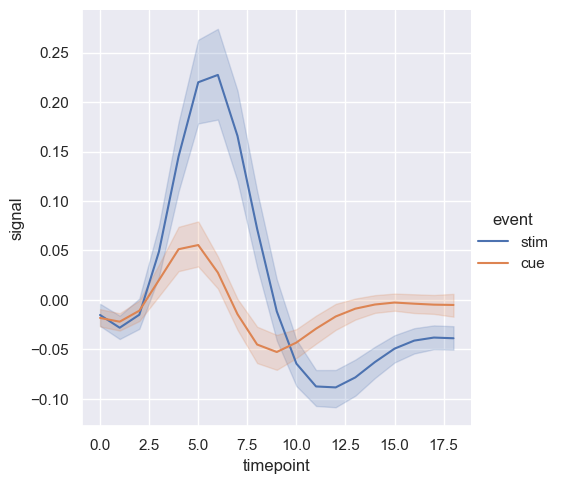

In [14]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

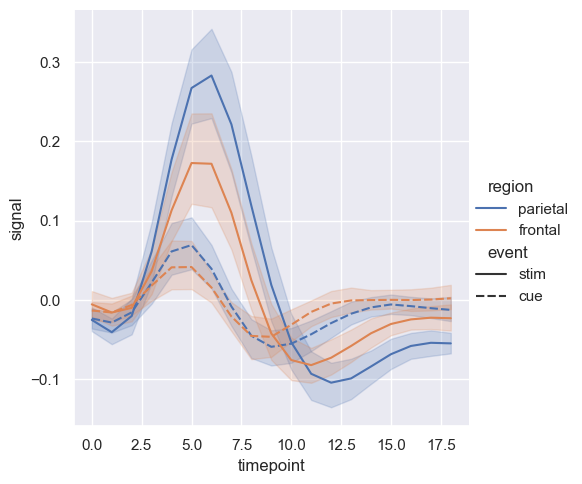

In [15]:
# 라인플롯에 스타일시맨틱 추가 : (기본값) 라인의 대시 패턴 변경
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

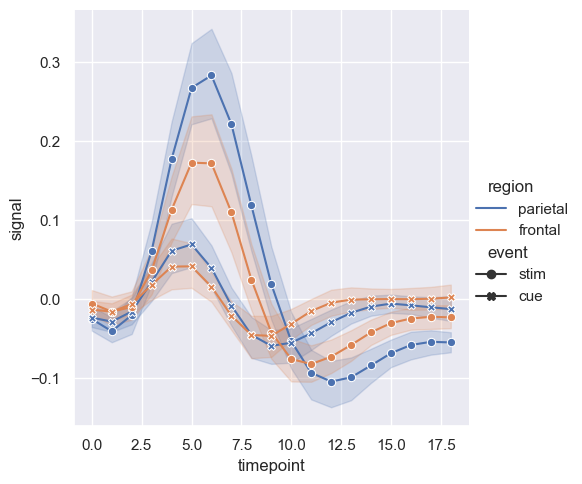

In [16]:
# 마커로 구별
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

산점도와 마찬가지로 여러 의미 체계를 사용하여 선 그림을 만들 때는 주의해야 합니다.  
때로는 유익하지만 구문 분석하고 해석하기 어려울 수도 있습니다.  
그러나 하나의 추가 변수에 대한 변경 사항만 검사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다.  
이렇게 하면 흑백으로 인쇄하거나 색맹인 사람이 볼 때 플롯에 더 쉽게 접근할 수 있습니다.  

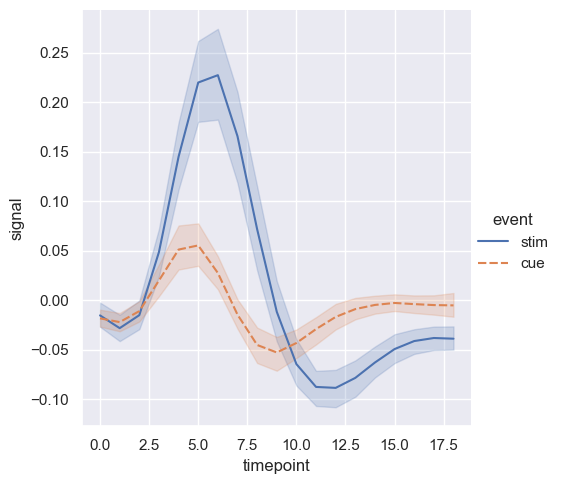

In [17]:
# 접근성(흑백, 색맹 등)을 위해 색과 스타일 모두 분리
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

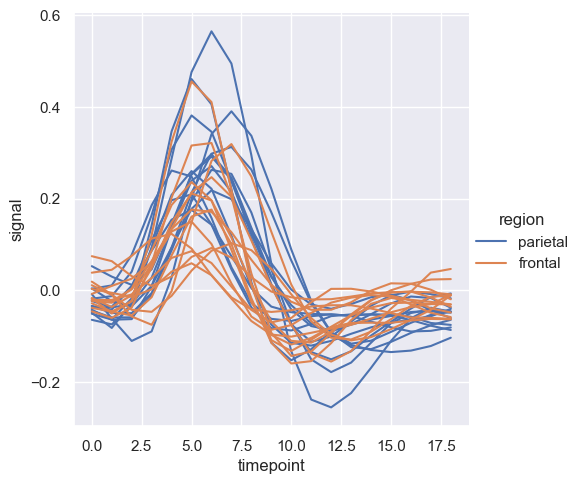

In [18]:
# 샘플링된 단위 있는 경우 : 시맨틱으로 구분하지 않고 개별적으로 표현 > 범례가 복잡해지는 것을 방지
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

기본 컬러맵과 lineplot()의 범례 처리는 색조 의미 체계가 범주형인지 숫자형인지에 따라 달라집니다.

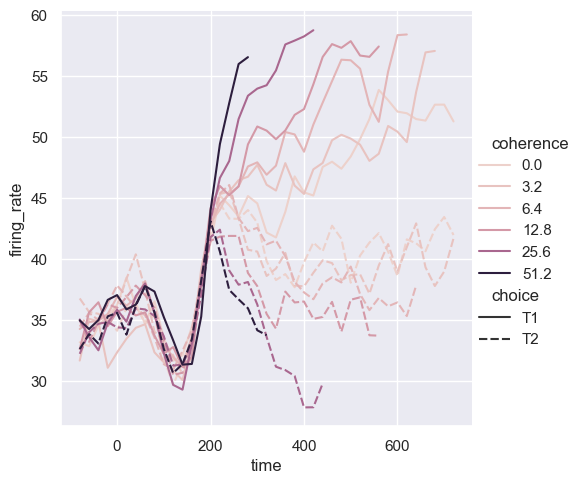

In [19]:
# 숫자형데이터의 색조처리 > 연속적인 그라디언트 색상들
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

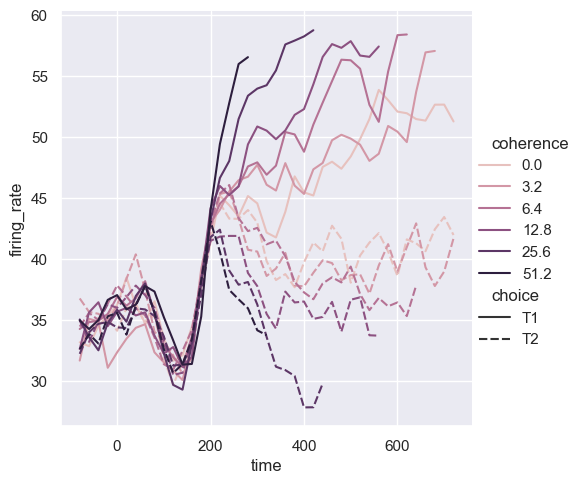

In [21]:
# 리스트/딕셔너리로 색상값을 조정하는 경우 특정 색상 값을 표현 할 수 있으며, 숫자데이터도 그라디언트 색상으로 표현되지 않을 수 있음
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

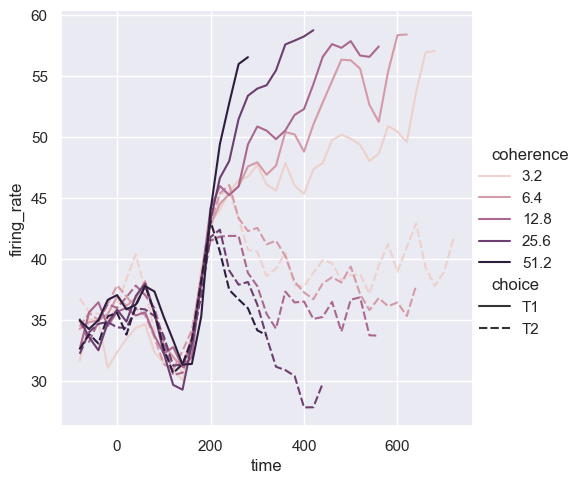

In [22]:
# 색상표 정규화 방식 변경(ex. cubehelix)
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

세 번째 의미인 크기는 줄의 너비를 변경합니다.

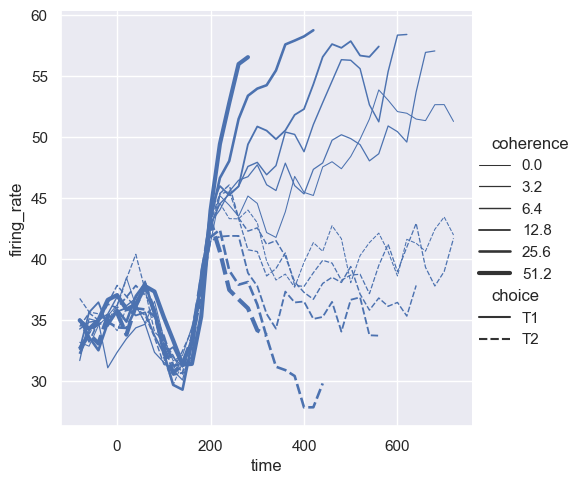

In [23]:
# 크기(size): line 너비 변경
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

크기 변수는 일반적으로 숫자이지만 범주형 변수를 선 너비와 매핑할 수도 있습니다.  
"굵은" 선은 "가는" 선보다 훨씬 더 구분하기 어려우니 사용시 주의하십시오.  
선 변동빈도가 높은 경우 대시를 인식하기 어려울 수 있으므로 이 경우 다른 너비를 사용하는 것이 더 효과적일 수 있습니다.  

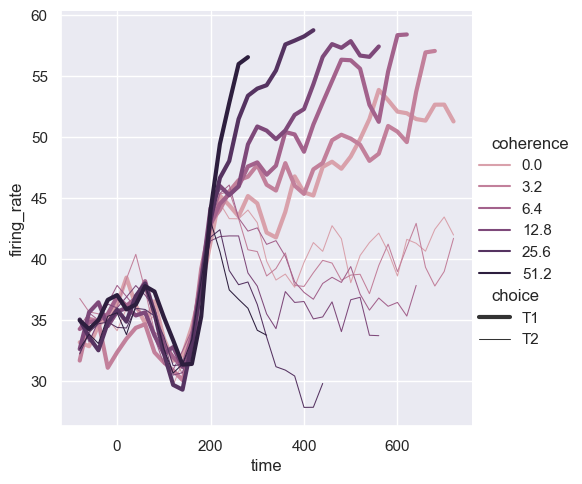

In [24]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

**Controlling sorting and orientation**  
lineplot()은 보통 x의 함수로 y를 그리려고 한다고 가정하기 때문에 기본적으로 플로팅하기 전 x 값을 기준으로 데이터를 정렬합니다.  
하지만 데이터 순서 변경을 원치 않을 경우 다음과 같이 비활성화할 수 있습니다.

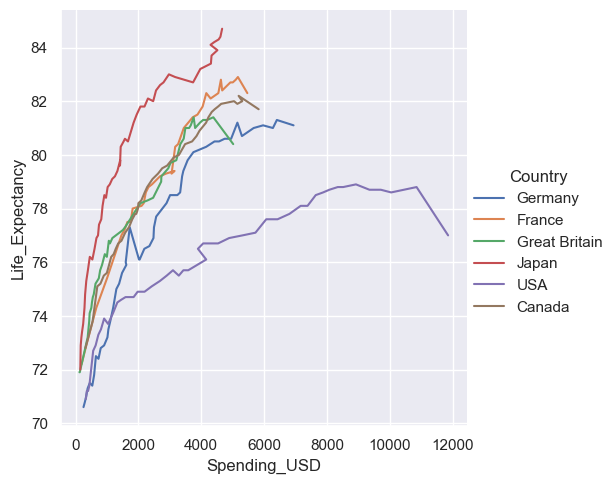

In [31]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

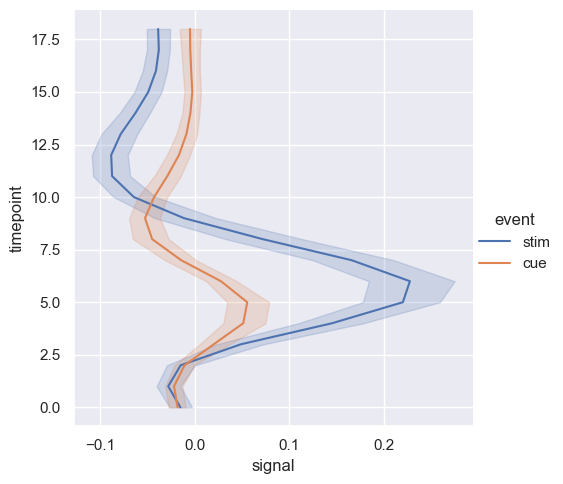

In [32]:
# y축 방향으로 정렬 및 집계 가능
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)

## Showing multiple relationships with facets
이 튜토리얼에서는 이러한 함수가 여러 시맨틱 변수를 한 번에 표시할 수 있지만, 항상 효과적인 것은 아니라는 점을 강조했습니다.하지만 두 변수 간의 관계가 하나 이상의 다른 변수에 어떻게 의존하는지 이해하고 싶을 때는 어떻게 해야 할까요?  

가장 좋은 방법은 둘 이상의 플롯을 만드는 것입니다. `relplot()`은 패싯그리드를 기반으로 하므로 이 작업을 쉽게 수행할 수 있습니다. 추가 변수의 영향을 표시하려면 플롯의 의미론적역할 중 하나에 변수를 할당하는 대신 이를 사용하여 비주얼리제이션을 '패싯화'합니다. 즉, 여러 축을 만들고 각 축에 데이터의 하위 집합을 그리는 것입니다:  

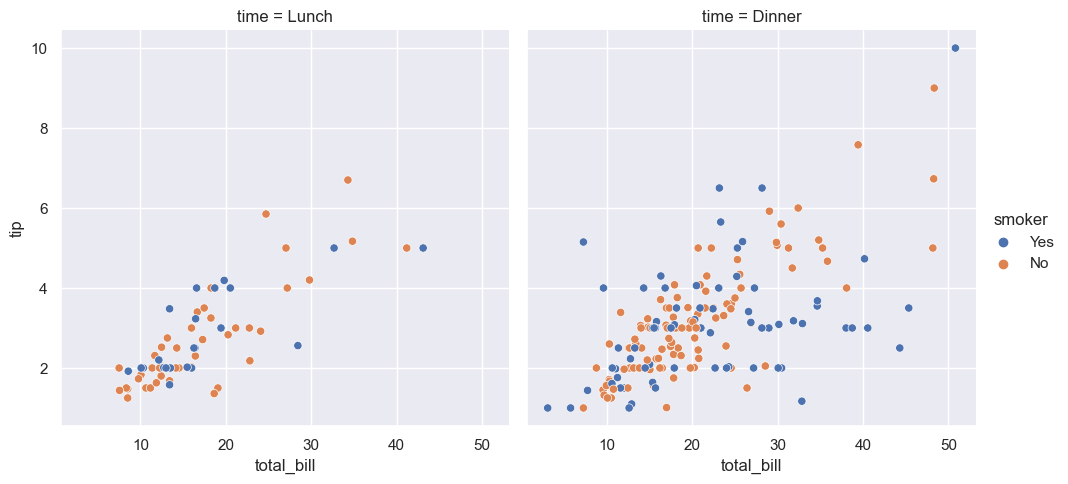

In [4]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

이 방법으로 두 변수의 영향을 표시할 수도 있습니다:
하나는 열에 패싯으로, 다른 하나는 행에 패싯으로 배치합니다.
그리드에 더 많은 변수를 추가하기 시작하면 그림 크기를 줄이는 것이 좋습니다.
FacetGrid의 크기는 각 패싯의 높이와 종횡비로 매개변수화된다는 점을 기억하세요:

In [5]:
fmri = sns.load_dataset("fmri")

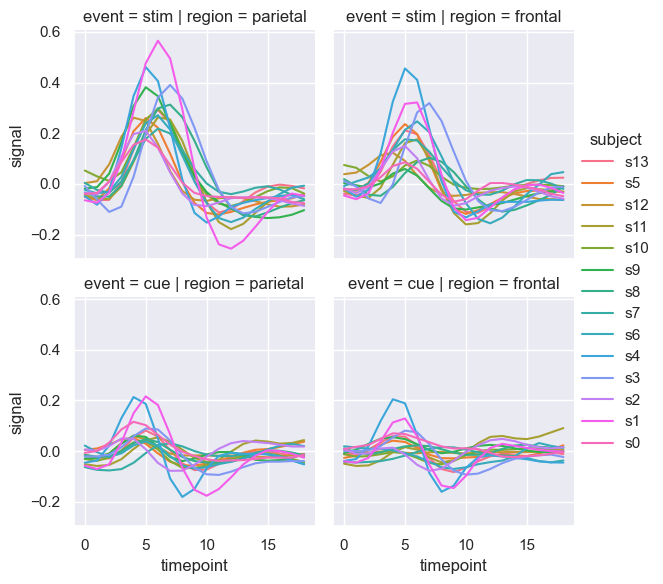

In [6]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

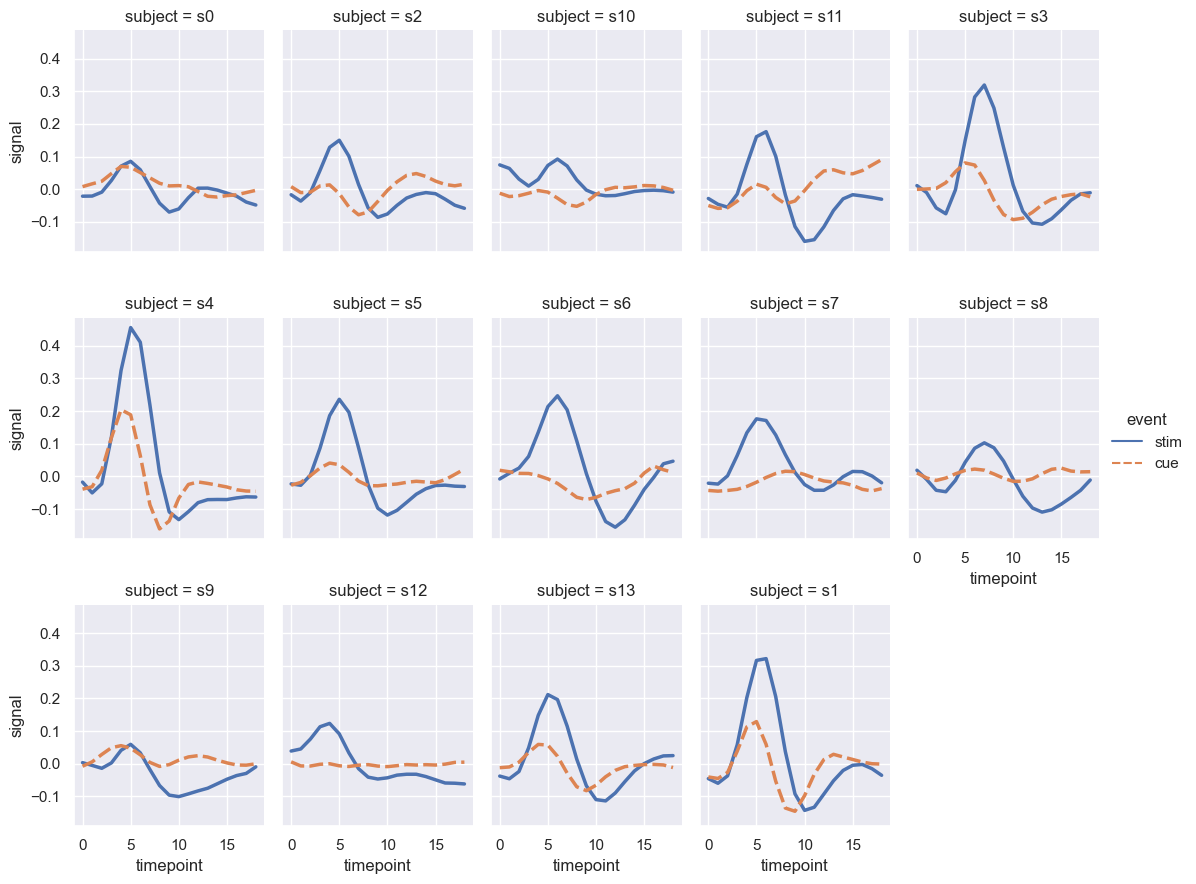

In [7]:
# 변수의 여러 수준에서 효과를 조사하려는 경우 해당 변수를 열에 패싯으로 표시한 다음 패싯을 행으로 '래핑'하는 것이 좋습니다:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)

'격자(lattice)' 플롯 또는 '소배수(small-multiples)'라고도 하는 이러한 시각화는 눈으로 전체 패턴과 패턴의 편차를 모두 쉽게 감지할 수 있는 형식으로 데이터를 표시하기 때문에 매우 효과적입니다.
스캐터플롯() 및 릴플롯()이 제공하는 유연성을 활용하되, 일반적으로 하나의 복잡한 플롯보다 여러 개의 간단한 플롯이 더 효과적이라는 점을 항상 염두에 두어야 합니다.

## Visualizing distributions of data
데이터를 분석하거나 모델링하려는 모든 노력의 초기 단계는 변수가 어떻게 분포되어 있는지 이해하는 것이어야 합니다. 
분포 시각화 기법은 여러 가지 중요한 질문에 대한 빠른 답을 제공할 수 있습니다. 
관찰 범위는 어느 정도인가? 중심 경향은 무엇인가? 한 방향으로 심하게 치우쳐 있는가? 바이모달리티에 대한 증거가 있는가? 유의미한 이상값이 있는가? 이러한 질문에 대한 답이 다른 변수에 의해 정의된 하위 집합에 따라 달라지는가?

분포 모듈에는 이와 같은 질문에 답하기 위해 고안된 여러 함수가 포함되어 있습니다. 축 수준 함수는 histplot(), kdeplot(), ecdfplot() 및 rugplot()입니다.
이들은 그림 수준의 displot(), jointplot() 및 pairplot() 함수 내에서 함께 그룹화됩니다.

분포를 시각화하는 방법에는 여러 가지가 있으며, 각 방법에는 상대적인 장점과 단점이 있습니다. 특정 목적에 가장 적합한 접근 방식을 선택할 수 있도록 이러한 요소를 이해하는 것이 중요합니다.

## Plotting univariate histograms
분포를 시각화하는 가장 일반적인 접근 방식은 히스토그램일 것입니다. 
히스토그램은 `displot()`의 기본 접근 방식으로, 히스토그램은 `histplot()`과 동일한 기본 코드를 사용합니다. 
히스토그램은 데이터 변수를 나타내는 축을 불연속 구간차원 집합으로 나누고 각 구간차원에 속하는 관측값의 수를 해당 막대의 높이를 사용하여 표시하는 막대형 차트입니다:

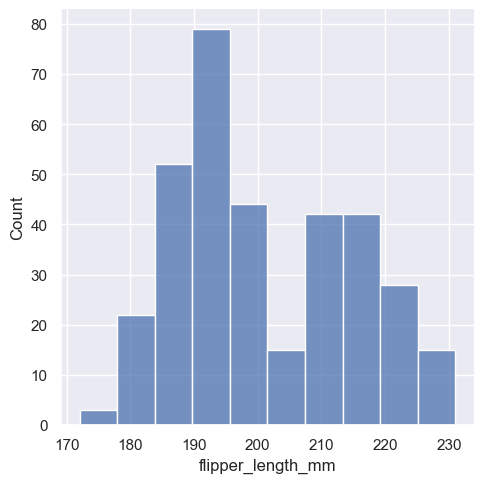

In [8]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

이 플롯은 flipper_length_mm 변수에 대한 몇 가지 인사이트를 즉시 제공합니다. 
예를 들어, 가장 일반적인 플리퍼 길이는 약 195mm이지만 분포가 이원형으로 나타나므로 이 한 가지 숫자로는 데이터를 잘 나타내지 못한다는 것을 알 수 있습니다.

**Choosing the bin size**
구간차원의 크기는 중요한 매개변수이며, 잘못된 구간차원 크기를 사용하면 데이터의 중요한 특징이 가려지거나 무작위 가변성으로 인해 명백한 특징이 나타나지 않아 오해의 소지가 있습니다.
기본적으로 `displot()`, `histplot()`은 데이터의 분산과 관측 횟수에 따라 기본 구간차원 크기를 선택합니다. 그러나 이러한 자동 접근 방식은 데이터 구조에 대한 특정 가정에 의존하기 때문에 지나치게 의존해서는 안 됩니다.
항상 다양한 빈 크기에 걸쳐 분포의 노출 수가 일관적인지 확인하는 것이 좋습니다. 크기를 직접 선택하려면 빈폭 매개변수를 설정합니다:

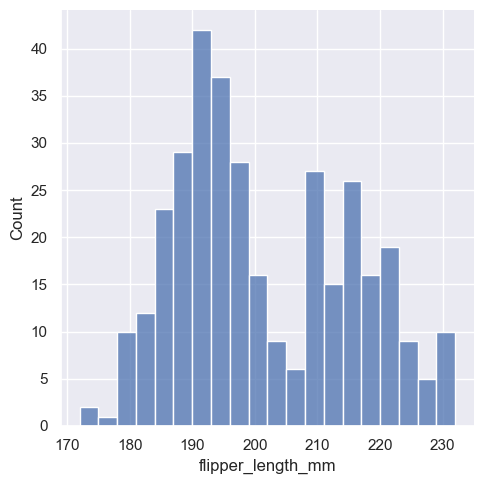

In [12]:
sns.displot(penguins, x="flipper_length_mm", binwidth = 3)

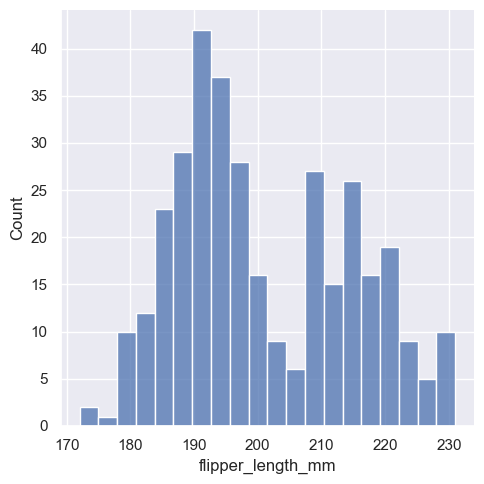

In [13]:
# 다른 상황에서는 크기보다는 bins의 개수를 지정하는 것이 더 합리적일 수 있습니다:
sns.displot(penguins, x="flipper_length_mm", bins=20)

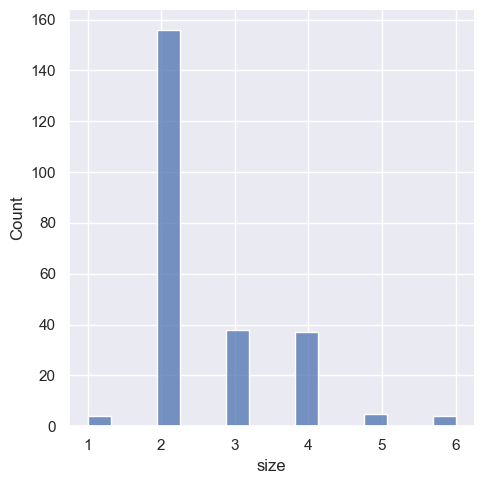

In [14]:
# 기본값이 실패하는 상황의 한 가지 예는 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우입니다. 
# 이 경우 기본 구간차원 너비가 너무 작아 분포에 어색한 간격이 생길 수 있습니다:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

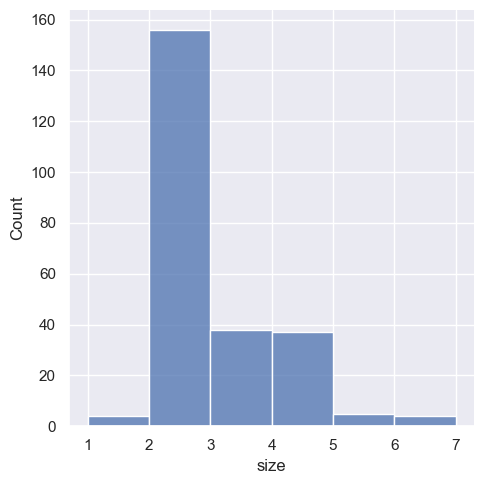

In [16]:
# 한 가지 방법은 빈에 배열을 전달하여 정확한 빈 나누기를 지정하는 것입니다:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

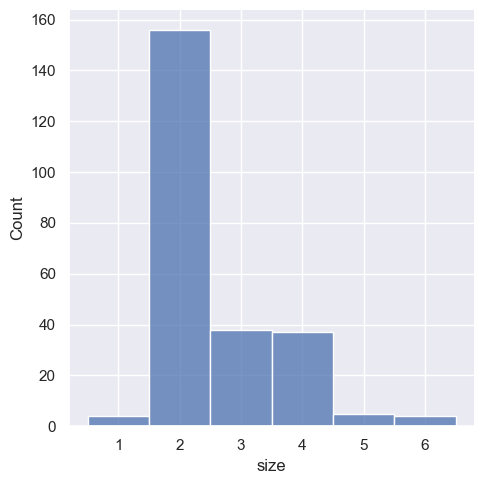

In [23]:
#불연속형=True를 설정하여 데이터 집합의 고유 값을 나타내는 구간차원 나누기를 해당 값을 중심으로 막대가 있는 막대로 선택할 수도 있습니다.
sns.displot(tips, x="size", discrete=True)

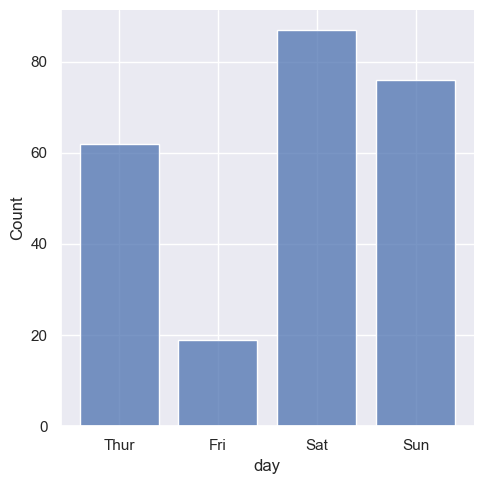

In [24]:
# 히스토그램의 논리를 사용하여 범주형 변수의 분포를 시각화할 수도 있습니다. 
# 범주형 변수의 경우 불연속형 구간차원이 자동으로 설정되지만, 
# 축의 범주적 특성을 강조하기 위해 막대를 약간 '축소'하는 것도 도움이 될 수 있습니다:
sns.displot(tips, x="day", shrink=.8)

**Conditioning on other variables**  
변수의 분포를 이해했다면, 다음 단계는 데이터 집합의 다른 변수에 따라 해당 분포의 특징이 다른지 여부를 묻는 것입니다. 
예를 들어, 위에서 본 플리퍼 길이의 바이모달 분포를 설명하는 것은 무엇일까요? 
디스플레이() 및 히스토그램() 함수는 색조 시맨틱을 통해 조건부 하위 집합을 지원합니다. 색조에 변수를 할당하면 각각의 고유 값에 대해 별도의 히스토그램이 그려지고 색상으로 구분됩니다:

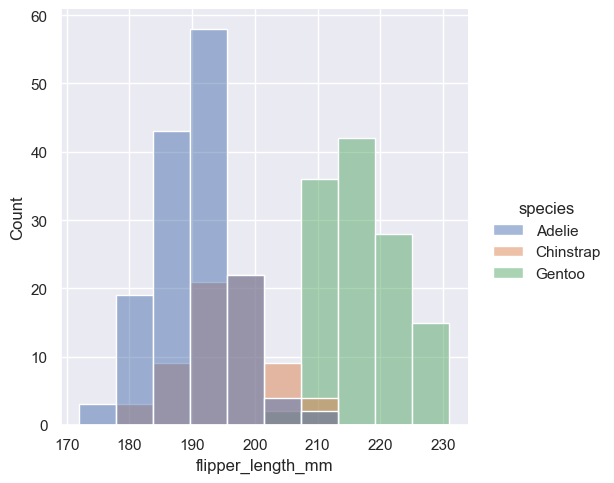

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

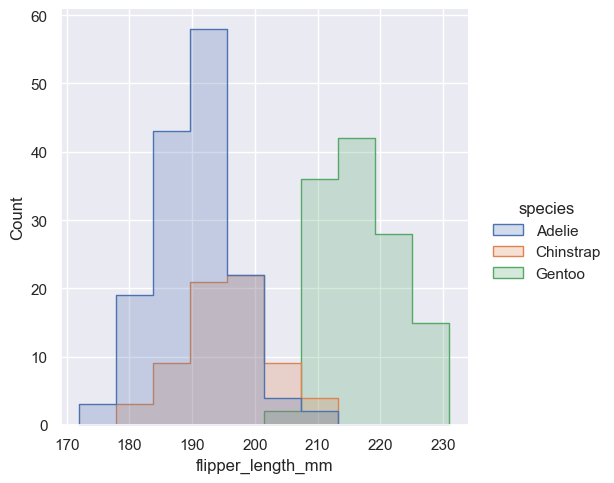

In [26]:
# 기본적으로 서로 다른 히스토그램은 서로 위에 '겹쳐져' 표시되며 경우에 따라 구분하기 어려울 수 있습니다. 
# 한 가지 옵션은 히스토그램의 시각적 표현을 막대형 플롯에서 '단계형' 플롯으로 변경하는 것입니다:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

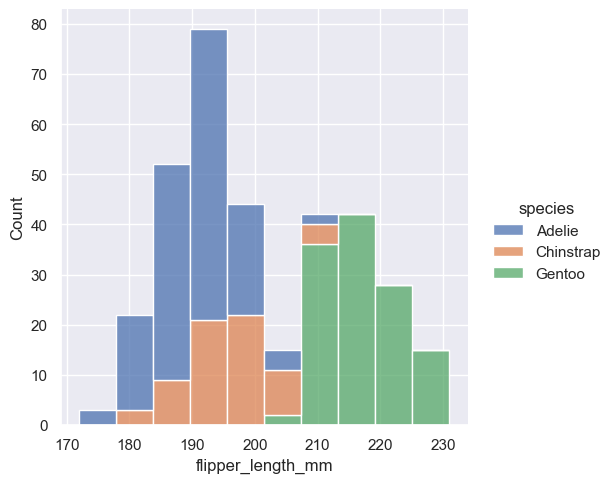

In [27]:
# 또는 각 막대를 겹겹이 쌓는 대신 "스택"하거나 세로로 이동할 수 있습니다. 
# 이 플롯에서는 전체 히스토그램의 윤곽이 단일 변수만 있는 플롯과 일치합니다:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

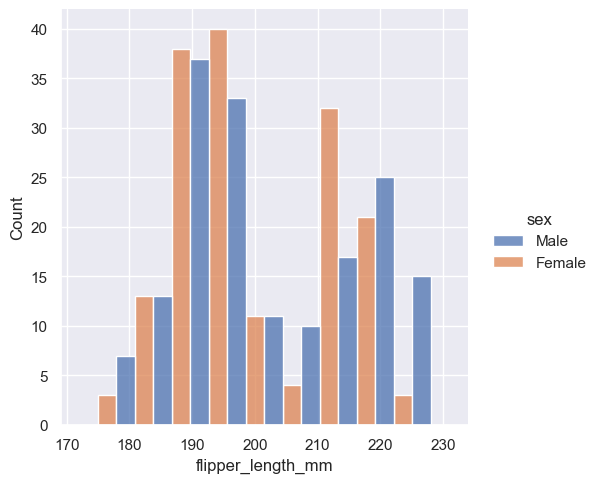

In [28]:
# 누적 히스토그램은 변수 간의 부분과 전체 관계를 강조하지만 다른 특징을 가릴 수 있습니다(예: 아델리 분포의 모드를 파악하기 어렵습니다). 
# 또 다른 옵션은 막대를 가로로 이동하고 너비를 줄이는 '닷지'입니다. 이렇게 하면 겹치는 부분이 없고 막대의 높이가 비슷하게 유지됩니다. 
# 그러나 범주형 변수의 수준 수가 적은 경우에만 잘 작동합니다:

sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

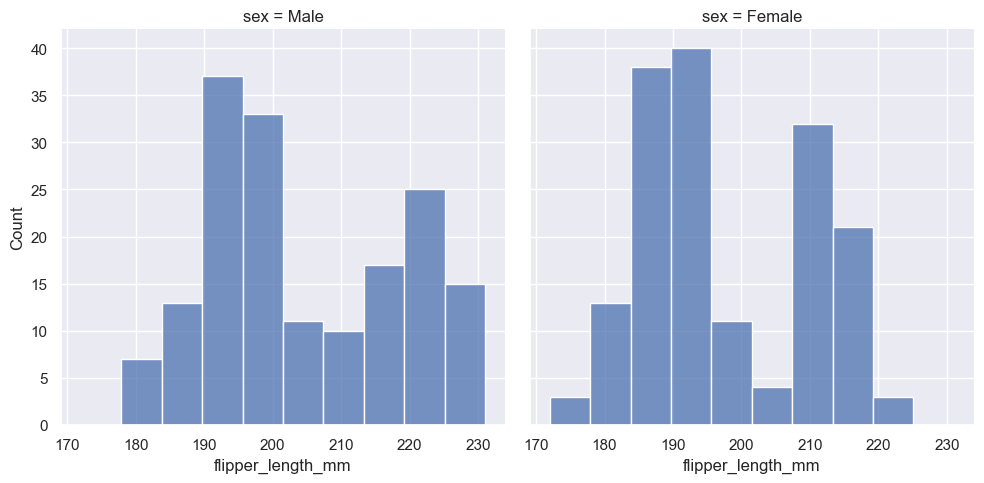

In [29]:
# displot()은 그림 수준 함수이고 패싯그리드에 그려지기 때문에 두 번째 변수를 색조 대신(또는 색조와 함께) 
# 열 또는 행에 할당하여 각각의 개별 분포를 별도의 하위 플롯에 그릴 수도 있습니다. 
# 이렇게 하면 각 하위 집합의 분포를 잘 나타내지만 직접 비교하기는 더 어렵습니다:

sns.displot(penguins, x="flipper_length_mm", col="sex")

이러한 접근 방식 중 어느 것도 완벽하지는 않으며, 곧 비교 작업에 더 적합한 히스토그램에 대한 몇 가지 대안을 보게 될 것입니다.

**Normalized histogram statistics**  
이 작업을 수행하기 전에 주의해야 할 또 다른 사항은 하위 집합의 관측값 수가 같지 않은 경우 개수 측면에서 분포를 비교하는 것이 이상적이지 않을 수 있다는 점입니다. 한 가지 해결책은 stat 매개변수를 사용하여 카운트를 정규화하는 것입니다:


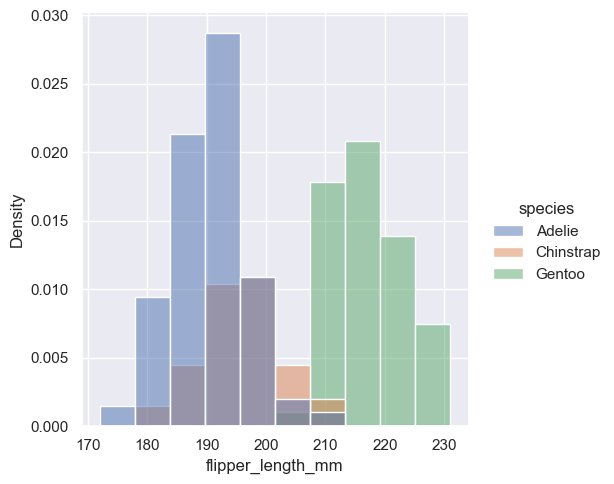

In [30]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

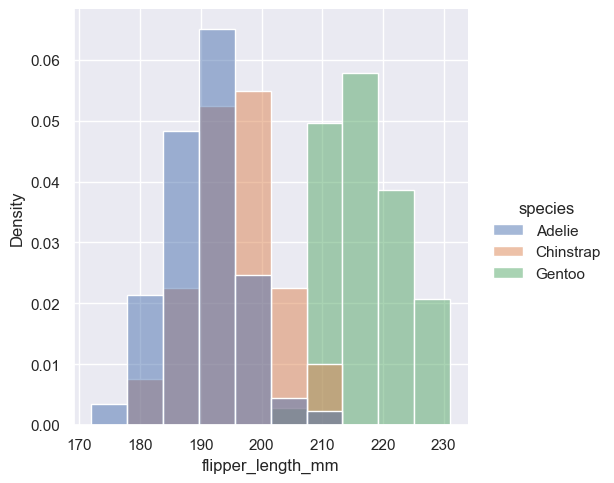

In [32]:
# 그러나 기본적으로 정규화는 전체 분포에 적용되므로 막대의 높이를 재조정하기만 하면 됩니다. 
# common_norm=False로 설정하면 각 하위 집합이 독립적으로 정규화됩니다:

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

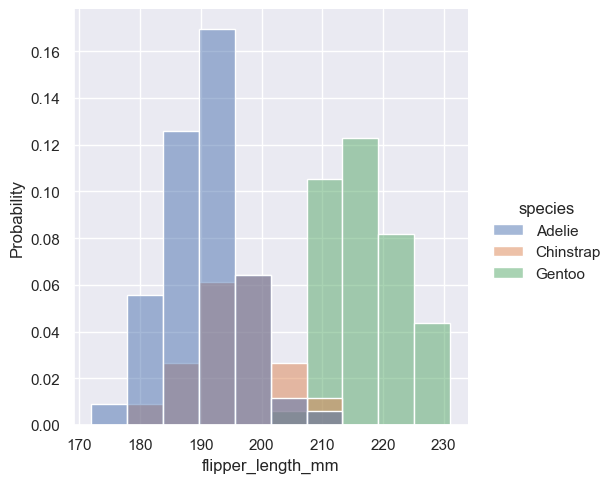

In [33]:
# 밀도 정규화는 막대의 크기를 조정하여 영역의 합이 1이 되도록 합니다. 결과적으로 밀도 축을 직접 해석할 수 없습니다. 
# 또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것입니다. 
# 이 옵션은 변수가 불연속형인 경우에 가장 적합하지만 모든 히스토그램에 대해 사용할 수 있는 옵션입니다:

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")